In [1]:
import pandas as pd

In [2]:
# Load dataset
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
# Check first 5 rows
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
# Basic info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Check missing values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
# Fill missing 'name' and 'host_name' with "Unknown"
df['name'].fillna("Unknown", inplace=True)
df['host_name'].fillna("Unknown", inplace=True)

In [7]:
# Fill missing 'reviews_per_month' with 0
df['reviews_per_month'].fillna(0, inplace=True)

In [8]:
# Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'])

In [9]:
# Check again to confirm
df.isnull().sum()

id                                    0
name                                  0
host_id                               0
host_name                             0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [10]:
# Summary statistics
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [11]:
# Value counts for neighbourhood groups
df['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [12]:
# Value counts for room types
df['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

In [13]:
# Remove listings with price = 0 or > 1000 (outliers)
df = df[(df['price'] > 0) & (df['price'] <= 1000)]

In [14]:
# Remove listings with minimum_nights > 365 (likely unrealistic)
df = df[df['minimum_nights'] <= 365]

In [15]:
# Check shape after cleaning
df.shape

(48631, 16)

In [16]:
import matplotlib.pyplot as plt

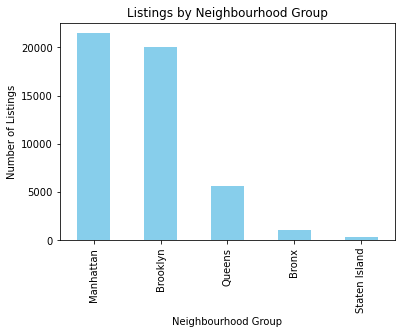

In [17]:
# Plot neighbourhood group counts
df['neighbourhood_group'].value_counts().plot(kind='bar', color='skyblue', figsize=(6,4))
plt.title("Listings by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.show()

In [18]:
import seaborn as sns

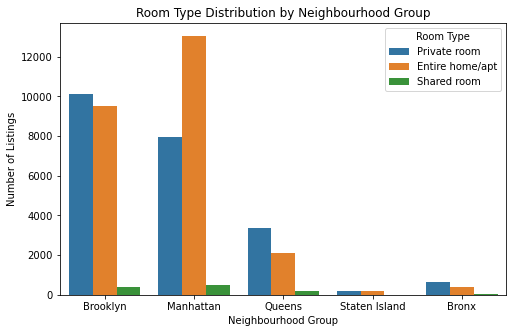

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x="neighbourhood_group", hue="room_type")
plt.title("Room Type Distribution by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Number of Listings")
plt.legend(title="Room Type")
plt.show()

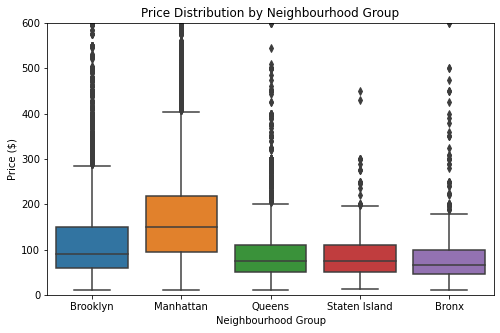

In [20]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="neighbourhood_group", y="price")
plt.ylim(0, 600)  # limit to avoid extreme outliers
plt.title("Price Distribution by Neighbourhood Group")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price ($)")
plt.show()

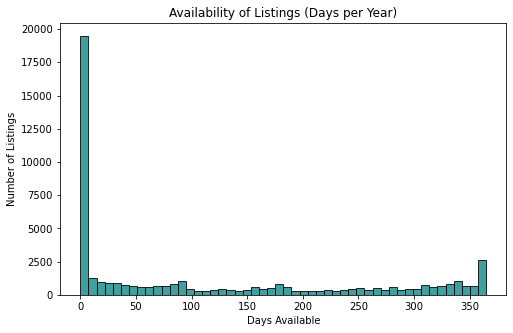

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['availability_365'], bins=50, kde=False, color="teal")
plt.title("Availability of Listings (Days per Year)")
plt.xlabel("Days Available")
plt.ylabel("Number of Listings")
plt.show()

In [22]:
# Top 10 hosts with most listings
top_hosts = df['host_id'].value_counts().head(10)

In [23]:
# Merge to get host names
top_host_info = df[df['host_id'].isin(top_hosts.index)][['host_id','host_name','calculated_host_listings_count']].drop_duplicates().sort_values(by="calculated_host_listings_count", ascending=False)

In [24]:
top_host_info

,host_id,host_name,calculated_host_listings_count
38293,219517861,Sonder (NYC),327
26137,107434423,Blueground,232
9740,30283594,Kara,121
32718,137358866,Kazuya,103
5093,16098958,Jeremy & Laura,96
30637,12243051,Sonder,96
14682,61391963,Corporate Housing,91
15865,22541573,Ken,87
34010,200380610,Pranjal,65
1386,1475015,Mike,52


In [25]:
# Top 10 listings with most reviews
top_reviews = df[['id','name','host_name','neighbourhood_group','number_of_reviews']].sort_values(by="number_of_reviews", ascending=False).head(10)

In [26]:
top_reviews

,id,name,host_name,neighbourhood_group,number_of_reviews
11759,9145202,Room near JFK Queen Bed,Dona,Queens,629
2031,903972,Great Bedroom in Manhattan,Jj,Manhattan,607
2030,903947,Beautiful Bedroom in Manhattan,Jj,Manhattan,597
2015,891117,Private Bedroom in Manhattan,Jj,Manhattan,594
13495,10101135,Room Near JFK Twin Beds,Dona,Queens,576
10623,8168619,Steps away from Laguardia airport,Maya,Queens,543
1879,834190,Manhattan Lux Loft.Like.Love.Lots.Look !,Carol,Manhattan,540
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,Danielle,Queens,510
4870,3474320,Private brownstone studio Brooklyn,Asa,Brooklyn,488
471,166172,LG Private Room/Family Friendly,Wanda,Brooklyn,480


In [27]:
conclusion = """
Key Insights:
1. Manhattan and Brooklyn dominate Airbnb listings in NYC.
2. Manhattan is the most expensive, while Bronx and Staten Island are cheapest.
3. Many listings are either never available (0 days) or always available (365 days).
4. Professional hosts like Sonder and Blueground manage hundreds of listings.
5. Listings near airports (JFK, LaGuardia) and central Manhattan receive the most reviews.
6. Entire homes/apartments are most common in Manhattan, while private rooms dominate Brooklyn.
"""
print(conclusion)


Key Insights:
1. Manhattan and Brooklyn dominate Airbnb listings in NYC.
2. Manhattan is the most expensive, while Bronx and Staten Island are cheapest.
3. Many listings are either never available (0 days) or always available (365 days).
4. Professional hosts like Sonder and Blueground manage hundreds of listings.
5. Listings near airports (JFK, LaGuardia) and central Manhattan receive the most reviews.
6. Entire homes/apartments are most common in Manhattan, while private rooms dominate Brooklyn.



In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [29]:
# Select features
features = ["neighbourhood_group", "room_type", "minimum_nights", 
            "number_of_reviews", "reviews_per_month", 
            "calculated_host_listings_count", "availability_365"]

In [30]:
# One-hot encode categorical features
X = pd.get_dummies(df[features], drop_first=True)
y = df["price"]

In [31]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Train model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [33]:
# Predictions
y_pred = model.predict(X_test)

In [34]:
# Evaluation
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [35]:
mae, r2

(56.39418678011296, 0.3224836905471452)

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [38]:
# Predictions
y_pred_rf = rf.predict(X_test)

In [39]:
# Evaluation
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [40]:
mae_rf, r2_rf

(54.982378550292, 0.3343362197665435)

In [41]:
import numpy as np

In [42]:
# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

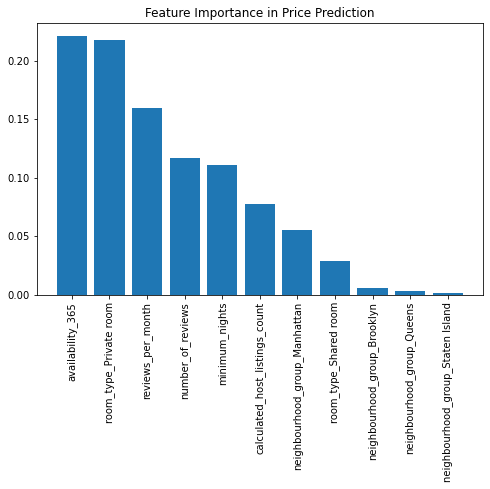

In [43]:
plt.figure(figsize=(8,5))
plt.title("Feature Importance in Price Prediction")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [X.columns[i] for i in indices], rotation=90)
plt.show()